EDA and Data Cleaning using Spaceship Titanic Dataset for machine learning purposes, we are only going to use train data for this one :)

### Context

Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

data source: https://www.kaggle.com/competitions/spaceship-titanic/data

### Data Attributes

train.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.
- PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
- CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- Destination - The planet the passenger will be debarking to.
- Age - The age of the passenger.
- VIP - Whether the passenger has paid for special VIP service during the voyage.
- RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- Name - The first and last names of the passenger.
- Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'D:\DATASETS\Spaceship Titanic\train.csv')

In [3]:
df.sample(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
7922,8458_06,Europa,False,C/319/S,TRAPPIST-1e,26.0,True,1.0,5610.0,0.0,5.0,119.0,Minopus Bealvewd,True
4943,5269_01,Earth,False,E/336/S,TRAPPIST-1e,21.0,False,38.0,1.0,591.0,1.0,31.0,Mollen Ewisentley,True
4919,5246_02,Earth,False,F/1070/P,TRAPPIST-1e,NaN,False,0.0,13.0,643.0,47.0,0.0,Jodia Drakeekss,True
1579,1671_01,Europa,False,B/73/S,55 Cancri e,NaN,False,0.0,859.0,0.0,6704.0,64.0,Muonan Mosteraked,False
7480,8005_01,Earth,False,F/1528/S,55 Cancri e,22.0,False,0.0,15.0,0.0,548.0,124.0,Thel Olivasquez,False


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


In [7]:
df.describe(include = ['O']).T

,count,unique,top,freq
PassengerId,8693,8693,0001_01,1
HomePlanet,8492,3,Earth,4602
CryoSleep,8476,2,False,5439
Cabin,8494,6560,G/734/S,8
Destination,8511,3,TRAPPIST-1e,5915
VIP,8490,2,False,8291
Name,8493,8473,Gollux Reedall,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


Findings:
- The data has 8693 rows and 14 columns
- There are missing values in all variables except for 'PassengerID' and 'Transported' columns
- Each variable data type seems aligned
- There are 5 columns related to money spent on amenities: RoomService, FoodCourt, ShoppingMall, Spa, VRDeck
- Cabin column can be splitted into 3 different new column

Lets make additional column for total expenses spent and split cabin categories into 3 new columns

In [8]:
#Additional column for total amenities spent
df['TotalSpent'] = df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis = 1)

In [46]:
#Additional columns for Cabin split
cabinsplit = df['Cabin'].str.split("/", expand = True)
df['Cabin_1'] = cabinsplit[0]
df['Cabin_2'] = cabinsplit[1]
df['Cabin_3'] = cabinsplit[2]

In [10]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalSpent,Cabin_1,Cabin_2,Cabin_3
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0,F,1,S


Done!

In [11]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
TotalSpent        0
Cabin_1         199
Cabin_2         199
Cabin_3         199
dtype: int64

let's fill NA values from the categorical variable with "Unknown" value

In [32]:
#Lets make a new variable consisting only categorical columns
categorical = df.describe(include = ['O']).columns
categorical

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP',
       'Name', 'Cabin_1', 'Cabin_2', 'Cabin_3'],
      dtype='object')

In [33]:
for i in categorical:
    df[i].fillna('Unknown', inplace = True)

In [34]:
df[categorical].isna().sum()

PassengerId    0
HomePlanet     0
CryoSleep      0
Cabin          0
Destination    0
VIP            0
Name           0
Cabin_1        0
Cabin_2        0
Cabin_3        0
dtype: int64

Done! lets do the same on the NA value on numerical data

In [35]:
numerical = df.describe().columns
numerical

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'TotalSpent'],
      dtype='object')

In [36]:
#Replace null values into each columns mean
for i in range(0, len(numerical)):
    df[numerical[i]].fillna(df[numerical[i]].mean(), inplace = True)

In [37]:
df[numerical].isna().sum()

Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
TotalSpent      0
dtype: int64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   object 
 3   Cabin         8693 non-null   object 
 4   Destination   8693 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   object 
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8693 non-null   object 
 13  Transported   8693 non-null   bool   
 14  TotalSpent    8693 non-null   float64
 15  Cabin_1       8693 non-null   object 
 16  Cabin_2       8693 non-null   object 
 17  Cabin_3       8693 non-null   object 
dtypes: bool(1), float64(7), obje

Done!, lets move on

In [39]:
df.duplicated().sum()

0

Findings:
- No duplicated values detected

Lets set our variable ready for visualization

In [80]:
categorical = df.describe(include = ['O']).columns.drop(['PassengerId', 'Cabin', 'Name'])
numerical = df.describe().columns

In [81]:
categorical

Index(['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Cabin_1', 'Cabin_2',
       'Cabin_3'],
      dtype='object')

In [82]:
numerical

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'TotalSpent'],
      dtype='object')

### EDA

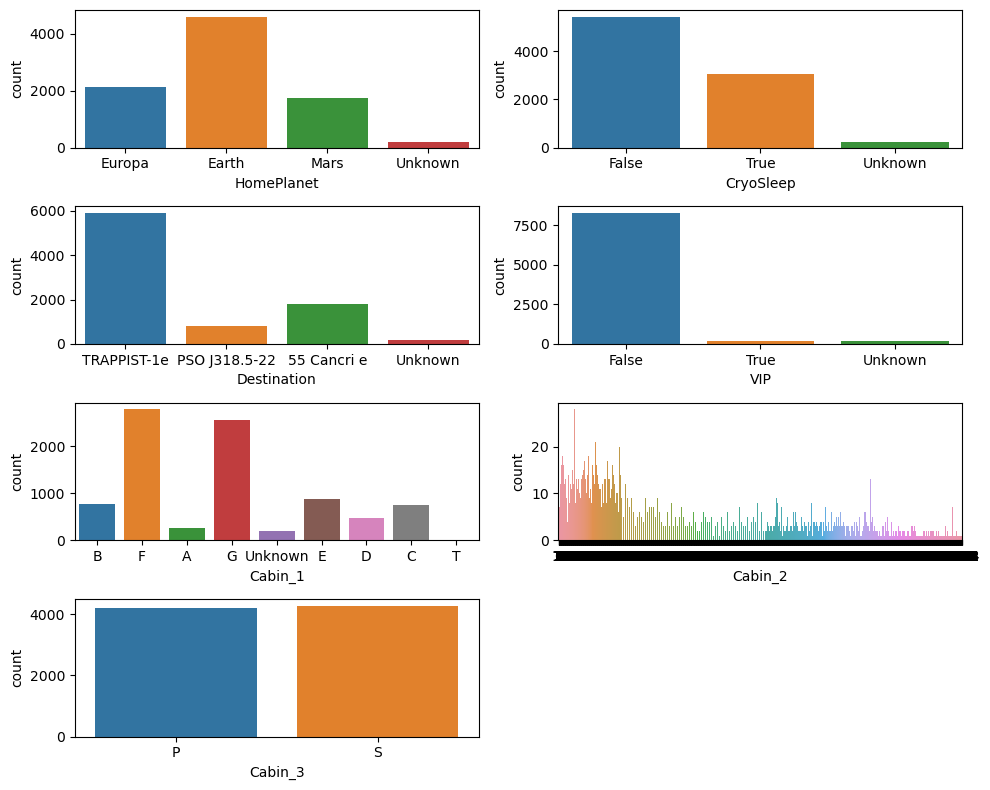

In [93]:
plt.figure(figsize = (10,8))

for i in range(0, len(categorical)):
    plt.subplot(4, 2, i+1)
    sns.countplot(x = df[categorical[i]])
    plt.tight_layout()

Findings:
- Earth as has the highest record on HomePlanet column
- Most passenger not on CryoSleep during the trip
- TRAPPIST-1e is the most popular destination
- Most passenger are non-VIP passenger
- Cabin F is the most occupied cabin folowed by cabin G by small margin on column Cabin_1
- Passenger distribution on cabin P and S almost equal on column cabin_3

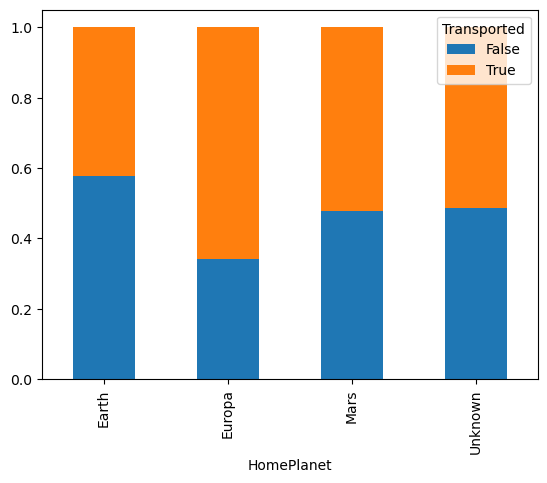

In [143]:
df.groupby(categorical[0])['Transported'].value_counts(normalize = True).unstack('Transported').plot.bar(stacked = True)
plt.show()

Findings: Passenger go for Europa has the highest percentage of transported passenger

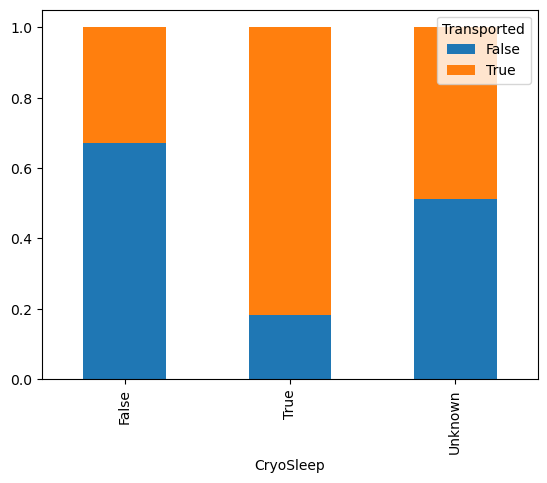

In [144]:
df.groupby(categorical[1])['Transported'].value_counts(normalize = True).unstack('Transported').plot.bar(stacked = True)
plt.show()

Findings: Passenger on Cryo sleep has a very high chance of getting transported

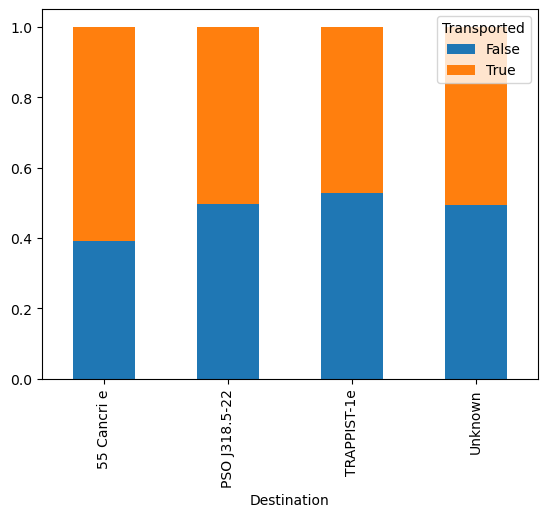

In [145]:
df.groupby(categorical[2])['Transported'].value_counts(normalize = True).unstack('Transported').plot.bar(stacked = True)
plt.show()

Findings: Passenger go for 55 Cancri e has the most case percentage of passenger transported, although its slightly more than other destination

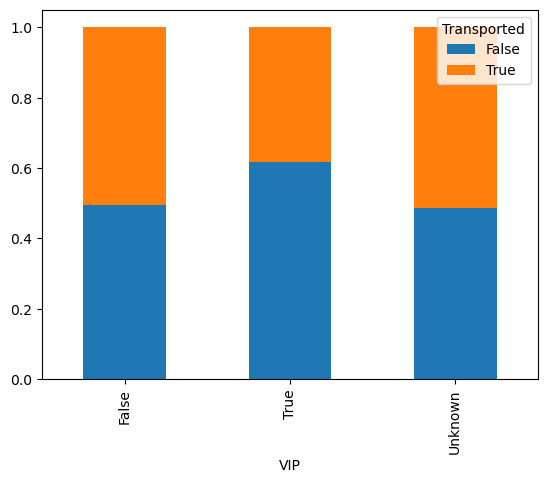

In [146]:
df.groupby(categorical[3])['Transported'].value_counts(normalize = True).unstack('Transported').plot.bar(stacked = True)
plt.show()

Findings: VIP passenger has the least percentage of transported passenger

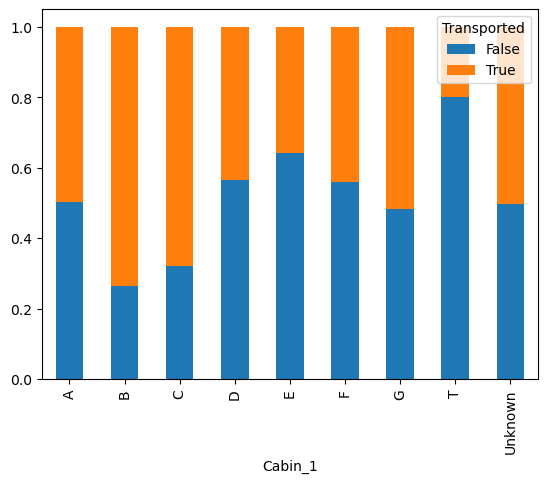

In [147]:
df.groupby(categorical[4])['Transported'].value_counts(normalize = True).unstack('Transported').plot.bar(stacked = True)
plt.show()

Findings: Passenger on cabin B has the most percentage of passenger transported while passenger on cabin T has the least percentage of passenger transported

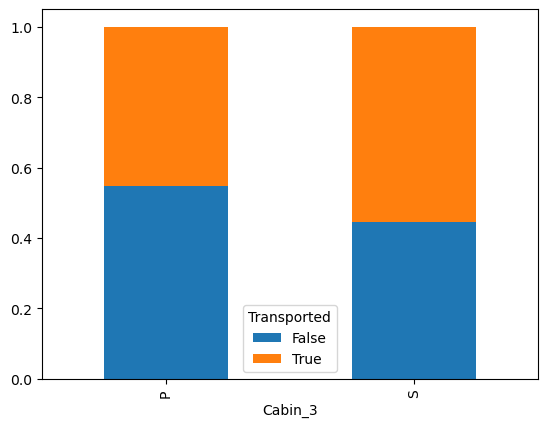

In [149]:
df.groupby(categorical[6])['Transported'].value_counts(normalize = True).unstack('Transported').plot.bar(stacked = True)
plt.show()

Findings: Passenger on cabin S has slightly higher percentage transported passenger than passenger on cabin P

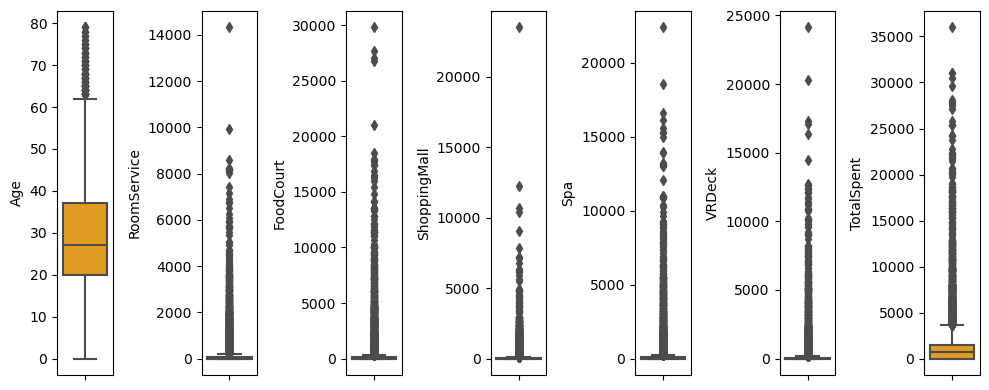

In [53]:
plt.figure(figsize=(10,4))
for i in range(0, len(numerical)):
    plt.subplot(1, len(numerical), i+1)
    sns.boxplot(y = df[numerical[i]], color = 'orange')
    plt.tight_layout()

Findings:
- Most of passenger on board did not spend at all on amenities

Overall:
- There are missing values in all variables except for 'PassengerID' and 'Transported' columns
- The data has no duplicated value
- Most passenger homeplanet are Earth, most passenger destination is TRAPPIST-1e, most passenger are not in cryo sleep or they are VIP passener, most passenger stayed in cabin F
- High percentage of passenger transported are coming from Europa, or are in Cryosleep, or are on to the destination to 55 Cancri e, on cabin B
- Most passenger did not spend at all or near zero on amenities